# Using Deeplay Applications

Deeplay provides you many ready applications. Applications are the main Deeplay objects that define the neural network architecture as well as the training process, including the loss, the optimizer, and the training logic.

In [1]:
import deeplay as dl

## Regression

### `Regressor`

The `Regressor` application is used to perform regression tasks. Its default loss is MAE.

In [2]:
net = dl.models.SmallMLP(in_features=10, out_features=1)

regressor = dl.Regressor(net)

print(regressor)

Regressor(
  (loss): L1Loss()
  (optimizer): Adam[Adam](lr=0.001)
  (train_metrics): MetricCollection,
    prefix=train
  )
  (val_metrics): MetricCollection,
    prefix=val
  )
  (test_metrics): MetricCollection,
    prefix=test
  )
  (model): SmallMLP(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Layer[Linear](in_features=10, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d]()
      )
      (1): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d]()
      )
      (2): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=1, bias=True)
        (activation): Layer[Identity]()
      )
    )
  )
)


## Classification

There are multiple types of classification tasks. The `Classifier` application is a general one, but there are also specific applications for binary, multiclass and multilabel classification tasks.

### `BinaryClassifier`

In [3]:
net = dl.models.SmallMLP(in_features=10, out_features=1)  # 0 or 1 as output.

classifier = dl.BinaryClassifier(net)

print(classifier)

BinaryClassifier(
  (loss): BCELoss()
  (train_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=train
  )
  (val_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=val
  )
  (test_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=test
  )
  (model): SmallMLP(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Layer[Linear](in_features=10, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d]()
      )
      (1): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d]()
      )
      (2): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=1, bias=True)
        (activation): Layer[Identity]()
      )
    )
  )
  (optimizer): Adam[Adam](lr=0.001)
)


### `CategoricalClassifier`

In [4]:
net = dl.models.SmallMLP(in_features=10, out_features=3)

classifier = dl.CategoricalClassifier(net, num_classes=3)  # Number of classes 
                                                           # matching the 
                                                           # number of output 
                                                           # features.

print(classifier)

CategoricalClassifier(
  (loss): CrossEntropyLoss()
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=train
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=val
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=test
  )
  (model): SmallMLP(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Layer[Linear](in_features=10, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d]()
      )
      (1): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d]()
      )
      (2): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=3, bias=True)
        (activation): Layer[Identity]()
      )
    )
  )
  (optim

### `MultiLabelClassifier`

In [5]:
net = dl.models.SmallMLP(in_features=10, out_features=3)

classifier = dl.MultiLabelClassifier(net)

print(classifier)

MultiLabelClassifier(
  (loss): BCELoss()
  (train_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=train
  )
  (val_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=val
  )
  (test_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=test
  )
  (model): SmallMLP(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Layer[Linear](in_features=10, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d]()
      )
      (1): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d]()
      )
      (2): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=3, bias=True)
        (activation): Layer[Identity]()
      )
    )
  )
  (optimizer): Adam[Adam](lr=0.001)
)


## Controlling the Loss Function

One of the primary functions of specific applications is providing a good default loss function ...

In [6]:
regressor_with_default_loss = dl.Regressor(net).create()

print("Default loss:", regressor_with_default_loss.loss)

Default loss: L1Loss()


... still you might want to customize the loss.

In [7]:
import torch

regressor_with_custom_loss = dl.Regressor(
    net, 
    loss=torch.nn.MSELoss(),
).create()

print("Custom loss:", regressor_with_custom_loss.loss)

Custom loss: MSELoss()


### Customizing the Loss Function

The loss function doesn't have to be a torch loss function. You can also define your own loss. The best way is subclassing `torch.nn.Module` and implementing the `forward()` method ...

In [8]:
class MyLossClass(torch.nn.Module):
    """My custom loss class."""
    
    def forward(self, y_pred, y_true):
        """Perform forward pass."""
        return torch.nn.functional.mse_loss(y_pred, y_true) + 1
    
regressor_with_custom_loss_class = dl.Regressor(
    net, 
    loss=MyLossClass(),
).create()

print("Custom loss class:", regressor_with_custom_loss_class.loss)

Custom loss class: MyLossClass()


... but you can also use a function.

In [9]:
def my_loss_fn(y_pred, y_true):
    """Calculate my custom loss."""
    return torch.nn.functional.mse_loss(y_pred, y_true) + 1

regressor_with_custom_loss_fn = dl.Regressor(
    net, 
    loss=my_loss_fn,
).create()

print("Custom loss function:", regressor_with_custom_loss_fn.loss)

Custom loss function: <function my_loss_fn at 0x2bc9d6020>


### Overriding the Class Implementation of the Loss Function

In some cases, the application might not provide the desired flexibility. In this case, you can subclass the application and override the `.compute_loss()` method.

In [10]:
class MyRegressor(dl.Regressor):
    """My regressor application with custom loss function."""
    
    def compute_loss(self, y_hat, y):
        """Compute my custom loss."""
        return torch.nn.functional.mse_loss(y_hat, y) + 1

my_regressor_with_custom_loss = MyRegressor(net).create()

print("Custom loss regressor:", my_regressor_with_custom_loss.loss)

Custom loss regressor: L1Loss()


**NOTE:** In this case, however, the `.loss` atttribute will still be set to the default loss, so you won't see the correct loss when you print it.

## Copntrolling the Optimizer

Deeplay provides some wrappers around the PyTorch optimizers. Their main use is to be able to create the optimizer before the model is built and the parameters are known. Examples of optimizers available in Deeplay are:

In [11]:
adam = dl.Adam(lr=0.01)

print(adam)

Adam[Adam](lr=0.01)


In [12]:
sgd = dl.SGD(lr=0.01, momentum=0.9)

print(sgd)

SGD[SGD](lr=0.01, momentum=0.9)


In [13]:
rmsprop = dl.RMSprop(lr=0.01)

print(rmsprop)

RMSprop[RMSprop](lr=0.01)


Furthermore, Deeplay also supports arbitrary optimizers through the `Optimizer` class.

In [14]:
adagrad = dl.Optimizer(torch.optim.Adagrad, lr=0.01)

print(adagrad)

Optimizer[Adagrad](lr=0.01)


You can assign an optimizer to an application using the `optimizer` parameter.

In [15]:
model = dl.Regressor(net, optimizer=adam).create()

print(model)

Regressor(
  (loss): L1Loss()
  (optimizer): Adam[Adam](lr=0.01)
  (train_metrics): MetricCollection,
    prefix=train
  )
  (val_metrics): MetricCollection,
    prefix=val
  )
  (test_metrics): MetricCollection,
    prefix=test
  )
  (model): SmallMLP(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Linear(in_features=10, out_features=32, bias=True)
        (activation): LeakyReLU(negative_slope=0.05)
        (normalization): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): LinearBlock(
        (layer): Linear(in_features=32, out_features=32, bias=True)
        (activation): LeakyReLU(negative_slope=0.05)
        (normalization): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): LinearBlock(
        (layer): Linear(in_features=32, out_features=3, bias=True)
        (activation): Identity()
      )
    )
  )
)


### Setting the Optimizer Through Subclassing

For complete control, you can subclass the application and implement the `.configure_optimizers()` method.  In this case, you should in general use the PyTorch optimizers directly, since the parameters are known at this point in the lifecycle of the application.

In [16]:
class MyRegressor(dl.Regressor):
    """My regressor with custom optimizer."""
    
    def configure_optimizers(self):
        """Configure my custom optimizer."""
        return torch.optim.Adam(self.parameters(), lr=0.01)

net = dl.models.SmallMLP(in_features=10, out_features=1)

model = MyRegressor(net).create()

print(model)

MyRegressor(
  (loss): L1Loss()
  (optimizer): Adam[Adam](lr=0.001)
  (train_metrics): MetricCollection,
    prefix=train
  )
  (val_metrics): MetricCollection,
    prefix=val
  )
  (test_metrics): MetricCollection,
    prefix=test
  )
  (model): SmallMLP(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Linear(in_features=10, out_features=32, bias=True)
        (activation): LeakyReLU(negative_slope=0.05)
        (normalization): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): LinearBlock(
        (layer): Linear(in_features=32, out_features=32, bias=True)
        (activation): LeakyReLU(negative_slope=0.05)
        (normalization): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): LinearBlock(
        (layer): Linear(in_features=32, out_features=1, bias=True)
        (activation): Identity()
      )
    )
  )
)


## Controlling the Metrics

Most applications support metrics. These can be calculated for a specific dataset (like the training or validation set) or for all datasets. All metrics should be instances of `torchmetrics.Metric`.

You can define the metrics as part of the application ...

In [17]:
import torchmetrics

mse_metric = torchmetrics.regression.MeanSquaredError()
mape_metric = torchmetrics.regression.MeanAbsolutePercentageError()
r2_metric = torchmetrics.regression.R2Score()
var_metric = torchmetrics.regression.ExplainedVariance()

net = dl.models.SmallMLP(in_features=10, out_features=1)

model = dl.Regressor(
    net,
    metrics=[mse_metric],  # On train, val and test.
    train_metrics=[mape_metric],  # On train only.
    val_metrics=[r2_metric],  # On val only.
    test_metrics=[var_metric],  # On test only.
).create()

... and see how they are used during training using the `Application.fit()` method ...

/Users/giovannivolpe/Documents/GitHub/deeplay/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ L1Loss           │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ model         │ SmallMLP         │  1.6 K │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 1.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.6 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/giovannivolpe/Documents/GitHub/deeplay/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/co
nnectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider
increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to improve performance.

/Users/giovannivolpe/Documents/GitHub/deeplay/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/co
nnectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. 
Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to improve 
performance.

(<Figure size 1500x1000 with 4 Axes>,
 array([[<Axes: title={'center': 'Loss'}, xlabel='Step'>,
         <Axes: title={'center': 'Meansquarederror'}, xlabel='Step'>],
        [<Axes: title={'center': 'R2score'}, xlabel='Step'>,
         <Axes: title={'center': 'Meanabsolutepercentageerror'}, xlabel='Step'>]],
       dtype=object))

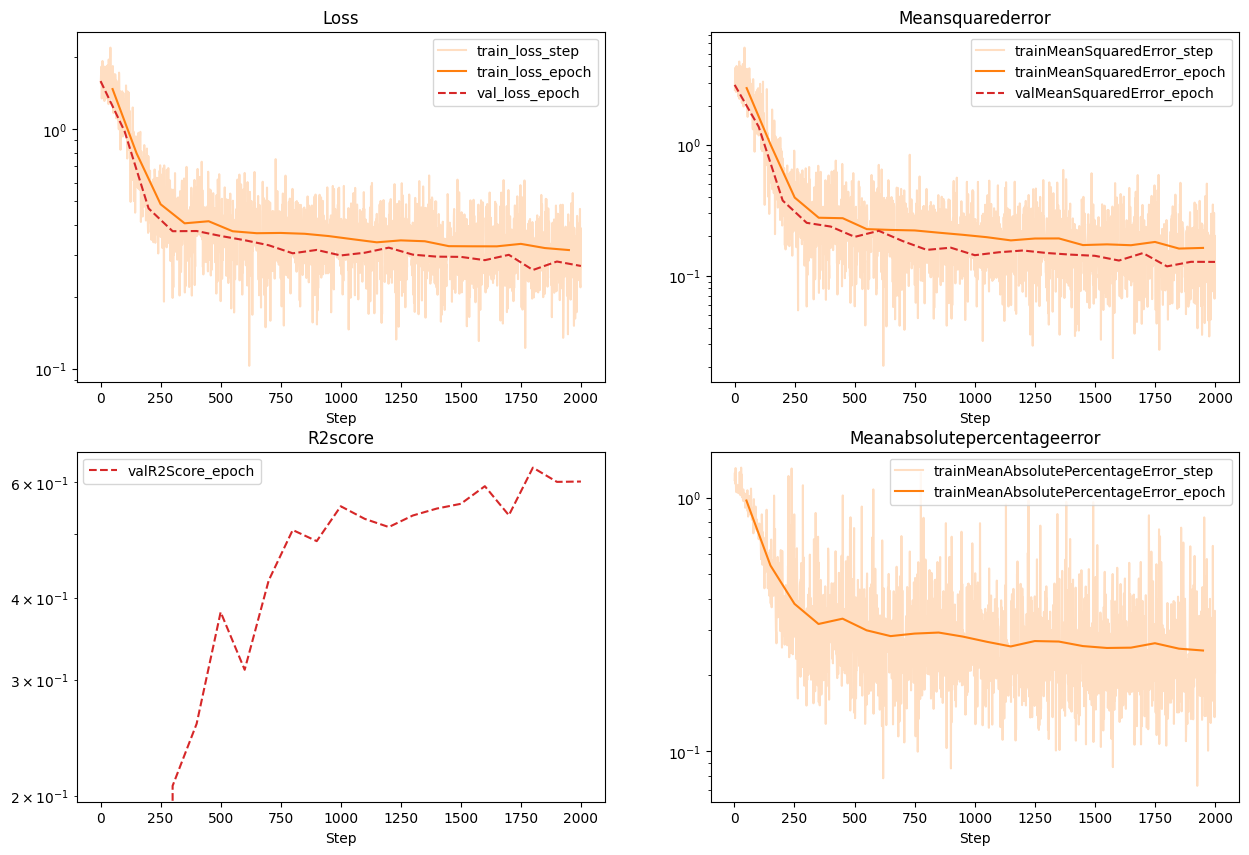

In [18]:
import numpy

x_numpy = numpy.random.randn(1000, 10)  # Input train data.
y_numpy = x_numpy.max(axis=1, keepdims=True)  # Target train data.

x_numpy_val = numpy.random.randn(100, 10)  # Input val data.
y_numpy_val = x_numpy_val.max(axis=1, keepdims=True)  # Target val data.

model.fit(
    (x_numpy, y_numpy), 
    max_epochs=20, 
    batch_size=10, 
    val_data=(x_numpy_val, y_numpy_val), 
    val_batch_size=50,
)
model.trainer.history.plot()

... and during testing using the `Application.test()` method ...

In [19]:
x_numpy_test = numpy.random.randn(100, 10)  # Input test data.
y_numpy_test = x_numpy_val.max(axis=1, keepdims=True)  # Target test data.

test_results = model.test((x_numpy_test, y_numpy_test))
print(f"Test results: {test_results}\n")                                        # Benjamin: Should this also work? If not, why not?

Output()

/Users/giovannivolpe/Documents/GitHub/deeplay/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:492: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/Users/giovannivolpe/Documents/GitHub/deeplay/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃         Test metric         ┃        DataLoader 0         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ testExplainedVariance_epoch │     -0.6924451589584351     │
│ testMeanSquaredError_epoch  │     0.5416191816329956      │
│       test_loss_epoch       │     0.5780741572380066      │
└─────────────────────────────┴─────────────────────────────┘

Test results: {'test_loss_epoch': 0.5780741572380066, 'testMeanSquaredError_epoch': 0.5416191816329956, 'testExplainedVariance_epoch': -0.6924451589584351}



... or the data loaders.

In [20]:
x_numpy_test = numpy.random.randn(100, 10)  # Input test data.
y_numpy_test = x_numpy_val.max(axis=1, keepdims=True)  # Target test data.

x_torch_test = torch.from_numpy(x_numpy_test).float()
y_torch_test = torch.from_numpy(y_numpy_test).float()

test_dataset = torch.utils.data.TensorDataset(x_torch_test, y_torch_test)

test_dataloader = dl.DataLoader(test_dataset, batch_size=10)

model.trainer.test(dataloaders=test_dataloader)

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃         Test metric         ┃        DataLoader 0         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ testExplainedVariance_epoch │     -0.6012520790100098     │
│ testMeanSquaredError_epoch  │     0.5141118764877319      │
│       test_loss_epoch       │     0.5338619947433472      │
└─────────────────────────────┴─────────────────────────────┘

/Users/giovannivolpe/Documents/GitHub/deeplay/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.


[{'test_loss_epoch': 0.5338619947433472,
  'testMeanSquaredError_epoch': 0.5141118764877319,
  'testExplainedVariance_epoch': -0.6012520790100098}]

## Understanding the Training History Object

The training history is stored in the `trainer.history` object. This is a dictionary containing the training and validation metrics for each epoch, and the training metrics for each step.

In [21]:
h = model.trainer.history

print(h.history.keys())  # Training and validation metrics at each epoch.

print(h.step_history.keys())  # Training (no validation!) metrics at each step.

dict_keys(['val_loss_epoch', 'valMeanSquaredError_epoch', 'valR2Score_epoch', 'train_loss_epoch', 'trainMeanSquaredError_epoch', 'trainMeanAbsolutePercentageError_epoch'])
dict_keys(['train_loss_step', 'trainMeanSquaredError_step', 'trainMeanAbsolutePercentageError_step'])


You can easily access the values of these metrics ...

In [22]:
print(h.history["trainMeanSquaredError_epoch"]["value"])
print(h.history["trainMeanSquaredError_epoch"]["step"])
print(h.history["trainMeanSquaredError_epoch"]["epoch"])

[2.727294683456421, 1.003098487854004, 0.395765095949173, 0.2772870361804962, 0.27496641874313354, 0.2268044799566269, 0.2236320674419403, 0.22159263491630554, 0.21299046277999878, 0.20519115030765533, 0.19672636687755585, 0.18594683706760406, 0.19220465421676636, 0.1924923062324524, 0.17121249437332153, 0.17339256405830383, 0.17077839374542236, 0.1809399127960205, 0.16097208857536316, 0.1628504991531372]
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


## Saving and loading models

Currently, the best way to save a model is to save the state dict.

**NOTE:** In the future, Deeplay might have a way to save the entire architecture through the config file, but that is not yet implemented.

In [23]:
torch.save(model.state_dict(), "model.pth")  # Saving.
model.load_state_dict(torch.load("model.pth"))  # Loading.

<All keys matched successfully>

## Using Callbacks

Deeplay supports PyTorch Lightning callbacks. These can be used to implement custom behavior during training. As an example, you can use a `EarlyStopping` callback and a `ModelCheckpoint` callback as shown below.

**NOTE:** Refer to the Lightning documentation for more information on the available callbacks and how to implement your own.

In [24]:
import lightning.pytorch.callbacks as callbacks

early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=1)
checkpoint = callbacks.ModelCheckpoint(monitor="val_loss", save_top_k=1)

net = dl.models.SmallMLP(in_features=10, out_features=1)

model = dl.Regressor(net).create()

model.fit(
    (x_numpy, y_numpy), 
    max_epochs=20, 
    batch_size=10, 
    val_data=(x_numpy_val, y_numpy_val), 
    val_batch_size=50, 
    callbacks=[early_stopping, checkpoint],
)

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ L1Loss           │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ model         │ SmallMLP         │  1.6 K │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 1.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.6 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/giovannivolpe/Documents/GitHub/deeplay/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/co
nnectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider
increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to improve performance.

/Users/giovannivolpe/Documents/GitHub/deeplay/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/co
nnectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. 
Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to improve 
performance.